In [ ]:
from scipy.special import expit as sigmoid, logit as inverse_sigmoid #Extracting individual predicted values
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from collections import Counter 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import cv
import xgboost as xgb
import os
import shap #Explainable model

#Define the path
path=os.getcwd()


## All Models Log Loss Evaluation Metrics

In [2]:
import plotly
import kaleido
import plotly.express as px
import plotly.graph_objects as go


df1 = pd.read_excel("logloss1.xlsx")
df2 = df1.iloc[:,1:]
colors = [ 'red', 'blue', 'green']

fig = go.Figure()
for i, col in enumerate(df2):
    fig.add_traces(go.Scatter(x=df1.Model, y = df2[col].values,
                              mode = 'markers',
                              name = col,
                              marker=dict(color=colors[i])))
fig.update_traces(marker_size=15)

fig.update_layout( scattergap=0.75,
    plot_bgcolor = "white")

fig.update_layout(title={
    'text': "<b>Evaluation Metrics for AIV Models </b>",
    'y':0.78,
    'x':0.45,
    'xanchor': 'center',
    'yanchor': 'top'})#,
    #width=650, height=400)
fig.update_xaxes(title_text='Model', showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(title_text='Logloss', showline=True, linewidth=2, linecolor='black', mirror=True)
fig.write_image("images/mlogloss_all_models.png", width=600, height=350, scale=2)


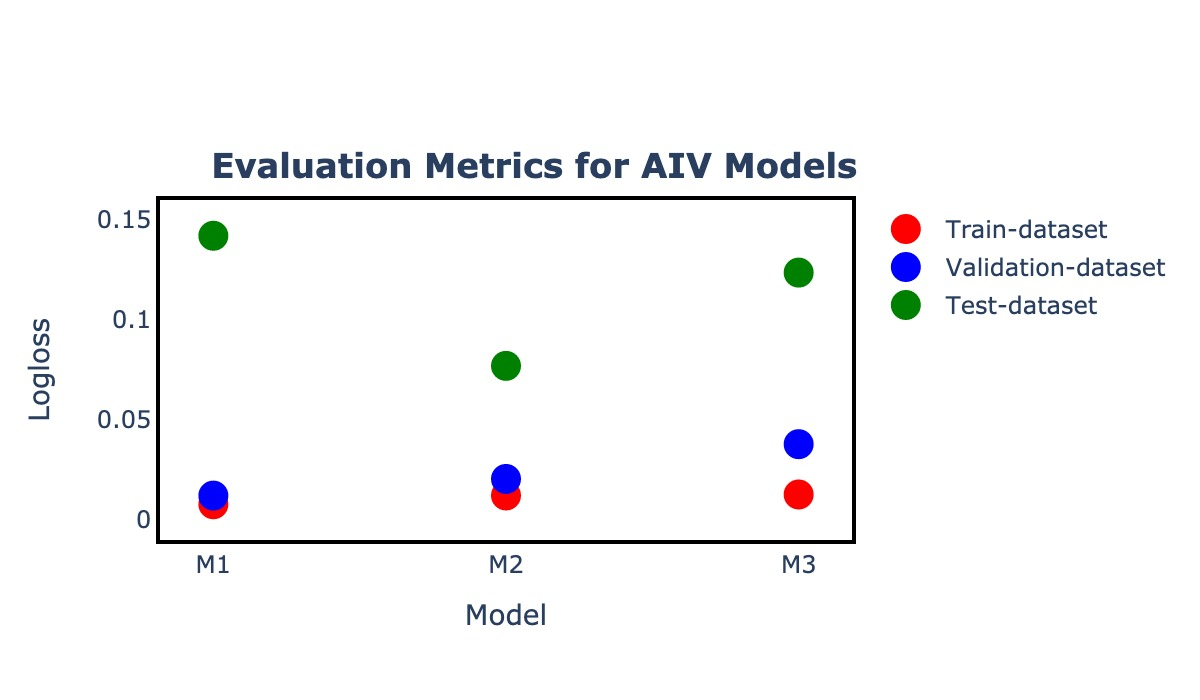

In [3]:
#View the Image inline
from IPython.display import Image
img_bytes = fig.to_image(format="jpg", width=600, height=350, scale=2,  engine="kaleido")
Image(img_bytes)


# Model one SHAP Analysis   (No Wild birds used as features)

In [2]:
#Load the model
bst1 = xgb.Booster({'nthread': 4}) #init model
bst1.load_model('../model1_code/model1xgb.model')

In [6]:
#Load Train and Test files
train_df = pd.read_excel("../m1train.xlsx")
test_df = pd.read_excel("../m1test.xlsx")




In [33]:
X_train = train_df.iloc[:,3:-1] #Training
y_train = train_df.iloc[:,-1:]

#Test
X_test = test_df.iloc[:,3:-1]
X_test_raw = test_df.iloc[:,3:-1]
y_test = test_df.iloc[:,-1:]
y_test_raw = test_df.iloc[:,-1:]

# valid= train_df[train_df['Year'] == 2021]
# dvalid_data = train_df.iloc[:,3:-1]
# dvalid_label=train_df.iloc[:,-1:]
# print(len(train_df))
# print(len(dvalid_label))
# dvalid = xgb.DMatrix(train_df, label=dvalid_label, missing=-999.0)

In [34]:
# dvalid_data = valid.iloc[:,2:-1]
# dvalid_label = valid.iloc[:,-1:]
# #dvalid = xgb.DMatrix(dvalid_data, label=dvalid_label, missing=-999.0)
# #print(len(train_df.columns))
# print(dvalid_label)
# print(dvalid_data)

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


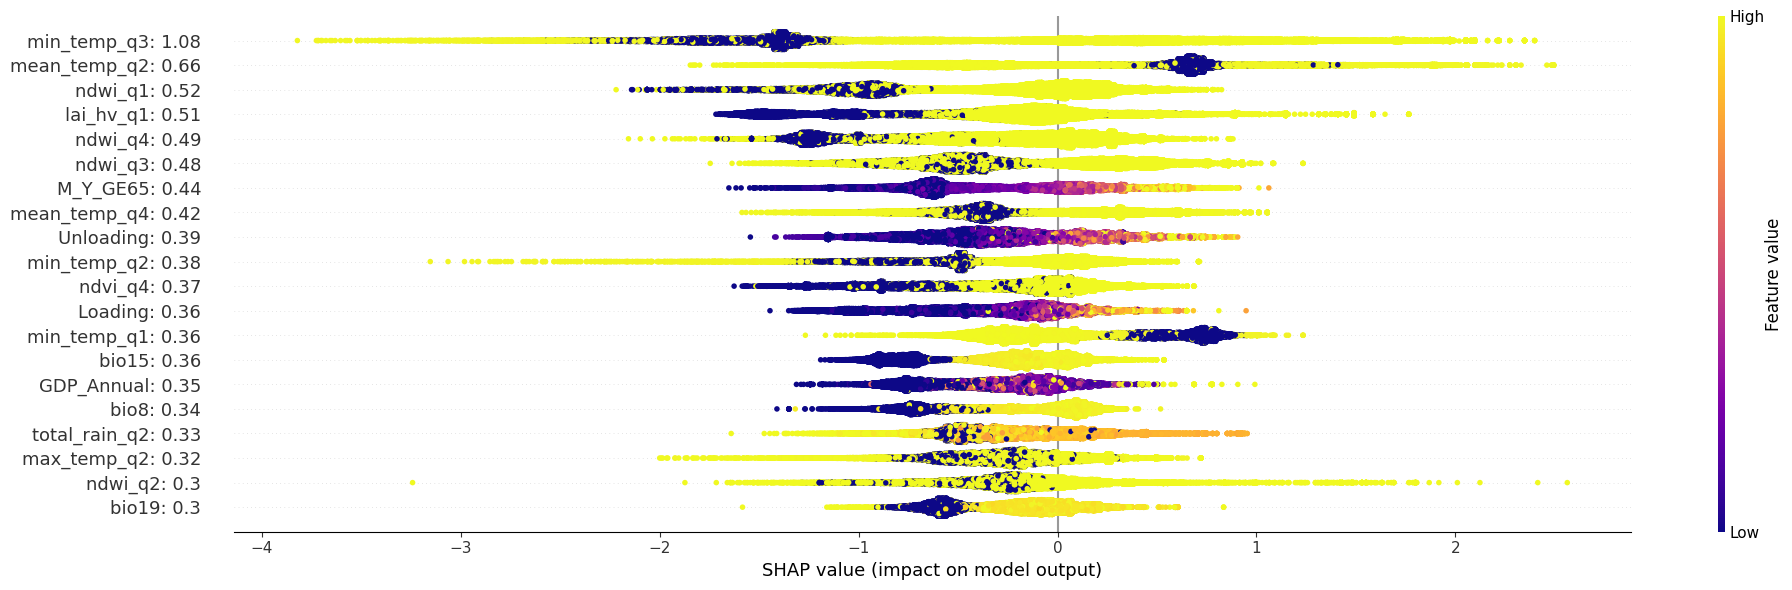

In [35]:
#Run SHAP model
explainer = shap.TreeExplainer(bst1)
shap_values = explainer.shap_values(X_train)
#print(shap_values)
feature_names = [a + ": " + str(b) for a,b in zip(X_train.columns, np.abs(shap_values).mean(0).round(2))]
shap.summary_plot(shap_values, 
                  features=X_train, 
                #cmap = plt.get_cmap("summer"),
                  cmap = plt.get_cmap("plasma"),
                  feature_names=feature_names,
                  show=False
                )
plt.gcf().set_size_inches(20,6)
plt.tight_layout()
plt.show()

####  M1 Bar Plot

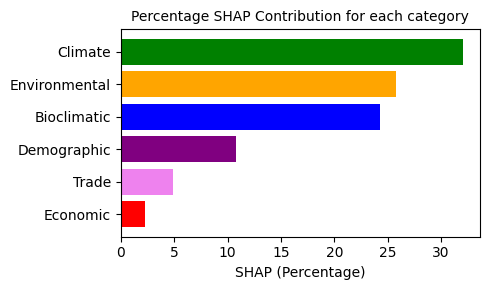

In [36]:
df = pd.read_excel("model1_bargraph.xlsx")
x = df["Variables"]
y = df["Percentage"]
color=["green", "orange", "blue", "purple", "violet", "red"]
plt.figure(figsize=(5,3))
plt.title("Percentage SHAP Contribution for each category", fontsize=10)
plt.xlabel("SHAP (Percentage)")
#plt.ylabel("Feature Category")
revcolor = color[::-1]
plt.barh(x,y, color=revcolor)
plt.tight_layout()
plt.savefig("images/model1_shapCat.png", dpi=500)



# Model Two SHAP Analysis  (Wild Birds used as features)

In [37]:
#Load M2 Model
bst2 = xgb.Booster({'nthread': 4}) #init model
bst2.load_model('../model2_code/model2xgb.model')
print("Successfully loaded the models.....")

Successfully loaded the models.....


In [38]:
#Load Train and Test Excel files
train_df2 = pd.read_excel("../m2train.xlsx")
test_df2 = pd.read_excel("../m2test.xlsx")
X_train2 = train_df2.iloc[:,3:] #Training
y_train2 = train_df2.iloc[:,2:3]

X_test2 = test_df2.iloc[:,3:]
X_test2_mat = xgb.DMatrix(X_test2)
X_test_raw2 = test_df2.iloc[:,3:]
y_test2 = test_df2.iloc[:,2:3]
y_test_raw2 = test_df2.iloc[:,2:3]

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


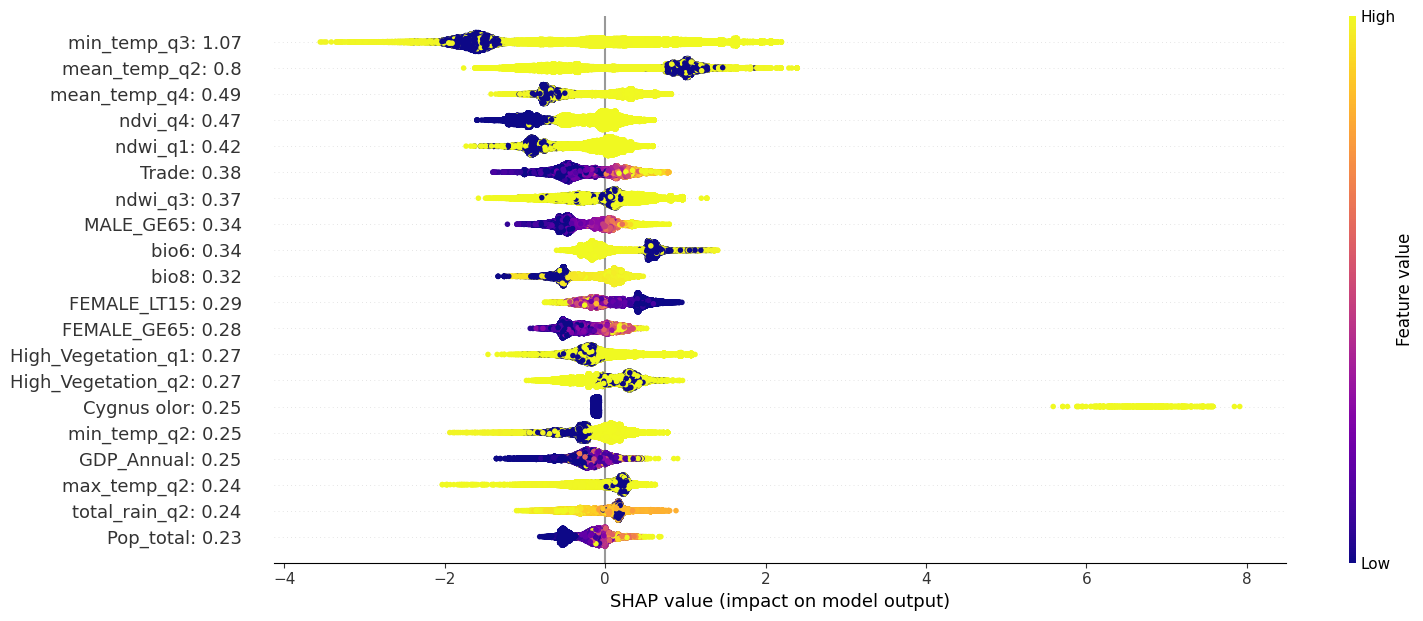

In [39]:
explainer = shap.TreeExplainer(bst2)
shap_values2 = explainer.shap_values(X_train2)
#print(shap_values)
feature_names = [a + ": " + str(b) for a,b in zip(X_train2.columns, np.abs(shap_values2).mean(0).round(2))]
shap.summary_plot(shap_values2, 
                  features=X_train2, 
                #cmap = plt.get_cmap("summer"),
                  cmap = plt.get_cmap("plasma"),
                  feature_names=feature_names,
                  show=False
                )
plt.gcf().set_size_inches(20,6)
plt.show()

#### M1 Bar Plot

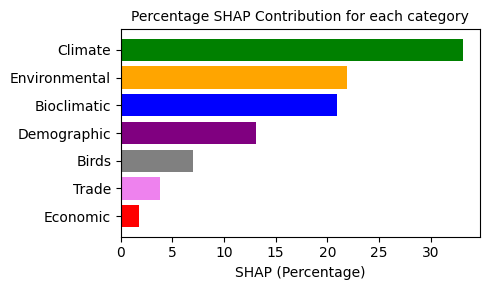

In [40]:
df = pd.read_excel("model2_bargraph.xlsx")
x = df["Variables"]
y = df["Percentage"]
color=["green", "orange", "blue", "purple", "gray", "violet", "red"]
revcolor = color[::-1]
plt.figure(figsize=(5,3))
plt.title("Percentage SHAP Contribution for each category",fontsize=10)
plt.xlabel("SHAP (Percentage)")
#plt.ylabel("Feature Category")
plt.barh(x,y, color=revcolor)
#plt.savefig("model2_bargraph.png")
plt.tight_layout()
plt.savefig("images/model2_shapCat.png", dpi=500)

# Model Three (Wild Bird Labels switched off)

In [41]:
#Load M3
bst3 = xgb.Booster({'nthread': 4}) #init model
bst3.load_model('../model3_code/model3xgb.model')
print("Successfully loaded the models.....")

Successfully loaded the models.....


In [2]:
#Retest

train_df3 = pd.read_excel("../../../old_data/m3train.xlsx")
test_df3 = pd.read_excel("../../../old_data/m3test.xlsx")
X_train3 = train_df3.iloc[:,3:] #Training
y_train3 = train_df3.iloc[:,2:3]

In [ ]:
#Load Train and Test Excel files
train_df3 = pd.read_excel("../m3train.xlsx")
test_df3 = pd.read_excel("../m3test.xlsx")
X_train3 = train_df3.iloc[:,3:] #Training
y_train3 = train_df3.iloc[:,2:3]

#Test 
X_test3 = test_df3.iloc[:,3:]
X_test_raw3 = test_df3.iloc[:,3:]
y_test3 = test_df3.iloc[:,2:3]
y_test_raw3 = test_df3.iloc[:,2:3]

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


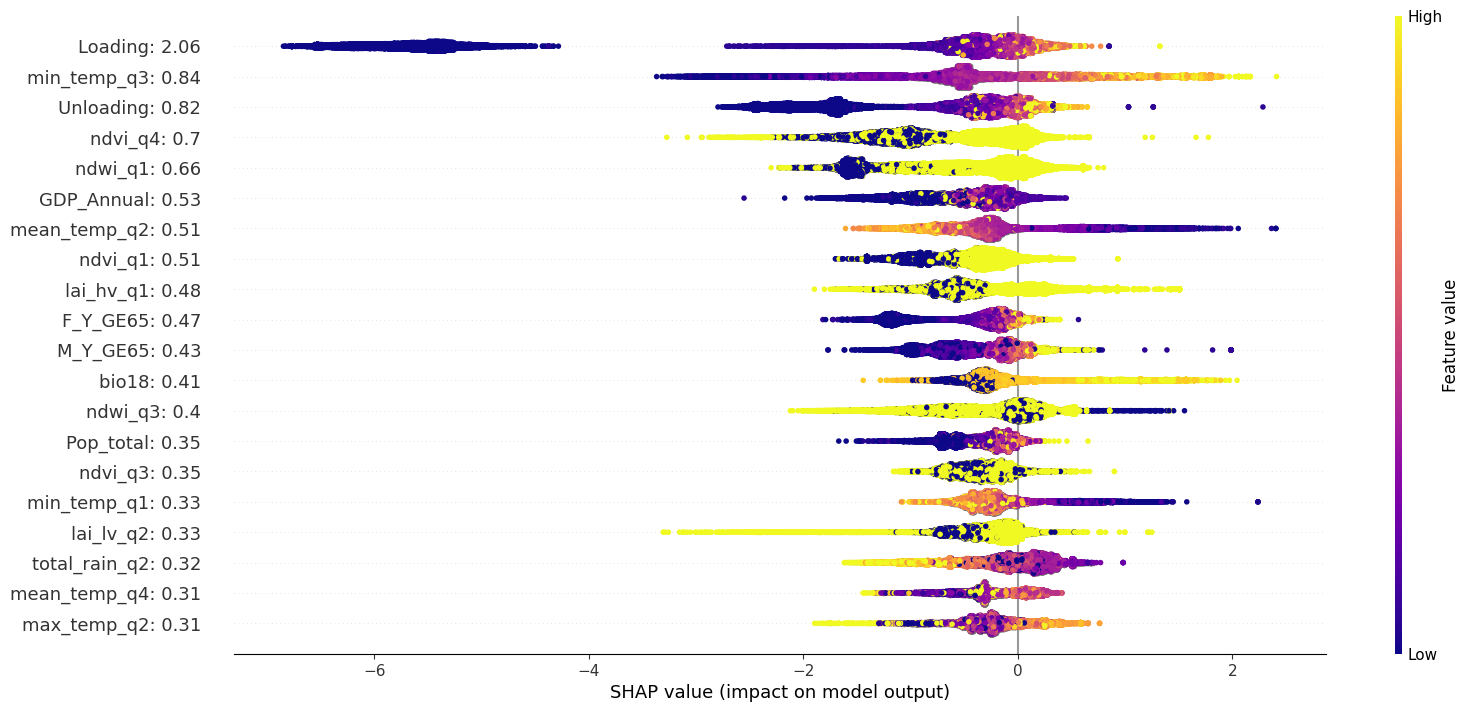

In [5]:
explainer = shap.TreeExplainer(bst3)
shap_values3x = explainer(X_train3)
shap_values3 = explainer.shap_values(X_train3)
#print(shap_values)
feature_names = [a + ": " + str(b) for a,b in zip(X_train3.columns, np.abs(shap_values3).mean(0).round(2))]
shap.summary_plot(shap_values3, 
                  features=X_train3, 
                #cmap = plt.get_cmap("summer"),
                  cmap = plt.get_cmap("plasma"),
                  feature_names=feature_names,
                  show=False
                )
plt.gcf().set_size_inches(20,7)
plt.show()

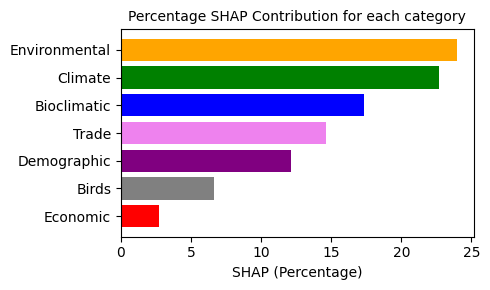

In [6]:
df = pd.read_excel("model3_bargraph.xlsx")
x = df["Variables"]
y = df["Percentage"]
#color=["green", "orange", "blue", "violet", "purple", "gray", "red"]
color=["orange", "green", "blue", "violet", "purple", "gray", "red"]
revcolor = color[::-1]
plt.figure(figsize=(5,3))
plt.title("Percentage SHAP Contribution for each category", fontsize = 10)
plt.xlabel("SHAP (Percentage)")
#plt.ylabel("Feature Category")
plt.barh(x,y, color=revcolor)
plt.tight_layout()
plt.savefig("images/model3_shapCat.png", dpi=500)